## Analysis and visualization of the data

### John A. Osorio 

For the results, refer to the notebook FinalProject_CNN.ipnyb

In [1]:
#libraries
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Opening the data

The data is in matlab format, so we need to transform it to a pandas DF

In [2]:
mat = scipy.io.loadmat('corn.mat')
print(mat["information"])

['This data set consists of 80 samples of corn measured on    '
 '3 different NIR spectrometers. The wavelength range is      '
 '1100-2498nm at 2 nm intervals (700 channels). The moisture, '
 'oil, protein and starch values for each of the samples is   '
 'also included. A number of NBS glass standards were also    '
 'measured on each instrument. The data was originally taken  '
 'at Cargill. Many thanks for Mike Blackburn for letting us   '
 'distribute it.                                              '
 '                                                            '
 'The variables in this data set are described below:         '
 '   information: [20x59  char  ] This field                  '
 '        m5spec: [80x700 dataset] Spectra on instrument m5   '
 '       mp5spec: [80x700 dataset] Spectra on instrument mp5  '
 '       mp6spec: [80x700 dataset] Spectra on instrument mp6  '
 '      propvals: [80x4   dataset] Property values for samples'
 '         m5nbs: [ 3x700 dataset] NBS g

We notice that "prop_vals" includes the "protein" information, this will be our target. Therefore, we will split this column into four columns, moisture, oil, protein and starch

In [3]:
print(mat["m5spec"])

[[(array(['m5spec'], dtype='<U6'), array(['data'], dtype='<U4'), array([], dtype='<U1'), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   48.345]]), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   53.016]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
        0.730594 ],
       [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
        0.72703  ],
       [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
        0.705967 ],
       ...,
       [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
        0.747532 ],
       [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
        0.735732 ],
       [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
        0.728245 ]]), array([[array([], dtype='<U1'), array([], dtype='<U1')],
       [array([], dtype='<U1'), array([], dtype='<U1')]], dtype=object), array([[array([], sha

In [4]:
m5spec = mat["m5spec"]["data"][0, 0] #the ["data"][0, 0] was specified due to the output of the previous row
mp5spec = mat["mp5spec"]["data"][0, 0]
mp6spec = mat["mp6spec"]["data"][0, 0]

In [5]:
mat["propvals"]["data"][0, 0]

array([[10.448,  3.687,  8.746, 64.838],
       [10.409,  3.72 ,  8.658, 64.851],
       [10.313,  3.496,  9.125, 63.567],
       [10.26 ,  3.504,  9.389, 63.263],
       [10.292,  3.661,  8.952, 64.148],
       [10.253,  3.507,  8.728, 64.287],
       [ 9.732,  3.699,  9.41 , 63.513],
       [ 9.739,  3.716,  9.595, 63.631],
       [10.335,  3.748,  9.445, 63.021],
       [10.108,  3.619,  9.334, 63.356],
       [ 9.754,  3.556,  8.504, 66.472],
       [ 9.407,  3.787,  8.737, 65.386],
       [ 9.942,  3.693,  8.268, 65.72 ],
       [ 9.978,  3.677,  7.788, 65.808],
       [ 9.911,  3.82 ,  8.918, 64.544],
       [ 9.673,  3.832,  9.018, 64.62 ],
       [10.221,  3.524,  9.092, 63.823],
       [ 9.857,  3.3  ,  9.452, 63.913],
       [10.302,  3.46 ,  9.333, 62.826],
       [ 9.818,  3.446,  9.073, 64.292],
       [10.169,  3.541,  9.711, 63.099],
       [10.034,  3.417,  9.694, 63.246],
       [ 9.691,  3.645,  8.685, 65.474],
       [ 9.78 ,  3.71 ,  8.729, 65.427],
       [10.143, 

In [6]:
print(mat["propvals"]["data"][0, 0].T.reshape(4, 80))
moisture, oil, protein, starch =  mat["propvals"]["data"][0, 0].T.reshape(4, 80) #we want to split the data into four columns!

[[10.448 10.409 10.313 10.26  10.292 10.253  9.732  9.739 10.335 10.108
   9.754  9.407  9.942  9.978  9.911  9.673 10.221  9.857 10.302  9.818
  10.169 10.034  9.691  9.78  10.143 10.346  9.748  9.641 10.069 10.723
  10.747 10.826 10.626 10.323 10.371 10.817 10.936 10.336 10.451 10.525
  10.535 10.882 10.592 10.296 10.311 10.13   9.817 10.273 10.08  10.315
  10.126 10.025  9.973 10.146 10.146 10.301  9.776 10.143  9.95   9.95
  10.303 10.597 10.413 10.32  10.55  10.993  9.958 10.398 10.509 10.831
   9.377  9.43  10.568 10.855  9.872 10.785 10.097 10.442 10.587 10.977]
 [ 3.687  3.72   3.496  3.504  3.661  3.507  3.699  3.716  3.748  3.619
   3.556  3.787  3.693  3.677  3.82   3.832  3.524  3.3    3.46   3.446
   3.541  3.417  3.645  3.71   3.67   3.479  3.766  3.822  3.449  3.212
   3.212  3.519  3.464  3.59   3.569  3.404  3.415  3.583  3.457  3.226
   3.264  3.316  3.201  3.28   3.424  3.435  3.363  3.556  3.494  3.584
   3.407  3.437  3.451  3.539  3.59   3.306  3.494  3.641  3.505

In [7]:
corn_df = pd.DataFrame({"m5spec": list(m5spec), "mp5spec": list(mp5spec), "mp6spec": list(mp6spec), "moisture": moisture, "oil": oil, "protein": protein, "starch": starch})

In [8]:
corn_df.head(5)

,m5spec,mp5spec,mp6spec,moisture,oil,protein,starch
0,"[0.0444948, 0.0443834, 0.0442581, 0.0442124, 0...","[-0.0124404, -0.0125138, -0.0125496, -0.012519...","[-0.0227014, -0.0228025, -0.0228795, -0.022913...",10.448,3.687,8.746,64.838
1,"[0.0465041, 0.0463485, 0.0462297, 0.0462051, 0...","[-0.0141888, -0.0142512, -0.0142884, -0.014264...","[-0.0219211, -0.0220554, -0.0221607, -0.022221...",10.409,3.720,8.658,64.851
2,"[0.0469579, 0.046817, 0.0466632, 0.0466015, 0....","[-0.0133733, -0.0134391, -0.0134764, -0.013456...","[-0.0208596, -0.0209931, -0.0211072, -0.021176...",10.313,3.496,9.125,63.567
3,"[0.0454611, 0.0453212, 0.0452048, 0.0451591, 0...","[-0.016487, -0.0165428, -0.0165762, -0.0165732...","[-0.0236308, -0.0237605, -0.0238691, -0.023937...",10.260,3.504,9.389,63.263
4,"[0.0539477, 0.0537859, 0.0536497, 0.0536129, 0...","[-0.0084945, -0.008567, -0.0085971, -0.0085664...","[-0.015174, -0.0153141, -0.0154367, -0.0155113...",10.292,3.661,8.952,64.148


### 2. Exploration of the data

In [9]:
cols = ["moisture", "oil", "protein", "starch"] 
aux_df = corn_df[cols]

In [10]:
aux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   moisture  80 non-null     float64
 1   oil       80 non-null     float64
 2   protein   80 non-null     float64
 3   starch    80 non-null     float64
dtypes: float64(4)
memory usage: 2.6 KB


In [11]:
aux_df.describe()

,moisture,oil,protein,starch
count,80.000000,80.000000,80.000000,80.000000
mean,10.233537,3.498388,8.668300,64.695600
std,0.380365,0.177047,0.498613,0.820734
min,9.377000,3.088000,7.654000,62.826000
25%,9.956000,3.406250,8.287500,64.264750
50%,10.282500,3.496500,8.561500,64.822000
75%,10.465500,3.642000,9.018750,65.345500
max,10.993000,3.832000,9.711000,66.472000


In [12]:
aux_df[aux_df.duplicated()]

,moisture,oil,protein,starch


In [13]:
aux_df.isnull().sum()

moisture    0
oil         0
protein     0
starch      0
dtype: int64

In [14]:
aux_df.isna().sum()

moisture    0
oil         0
protein     0
starch      0
dtype: int64

We see the data has been properly preparated. Let's check if the variables moisture, oil, protein and starch are correlated

<AxesSubplot:>

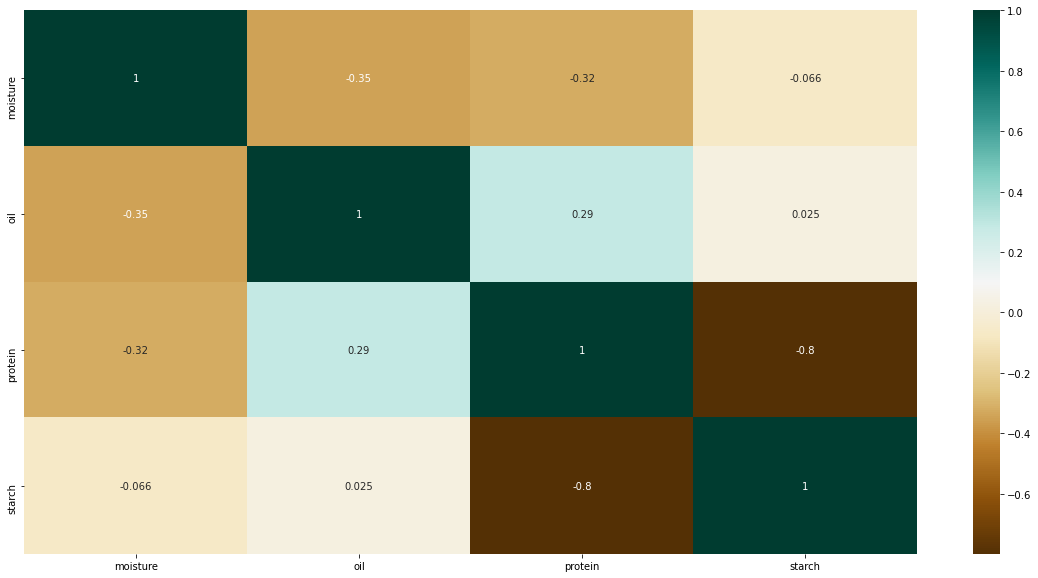

In [15]:
plt.figure(figsize=(20,10))
correlation_values= corn_df[cols].corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

<AxesSubplot:xlabel='starch', ylabel='protein'>

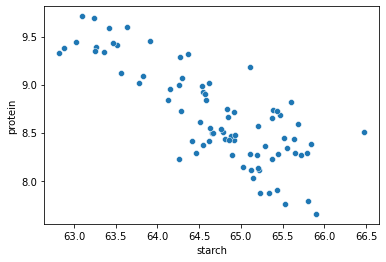

In [16]:
sns.scatterplot(data=corn_df,x='starch',y='protein')

There is a considerable correlation between protein and starch! However, it is below 0.88, besides, one of them is the target column. Now let's see the spectrums

Let's see the distribution of these columns!

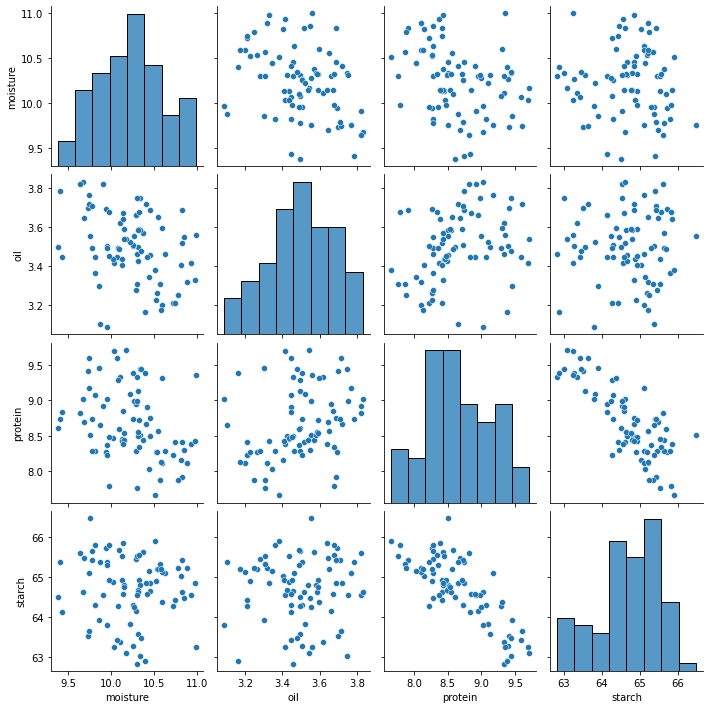

In [17]:
sns.pairplot(aux_df)

C:\Users\alexo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='protein', ylabel='Density'>

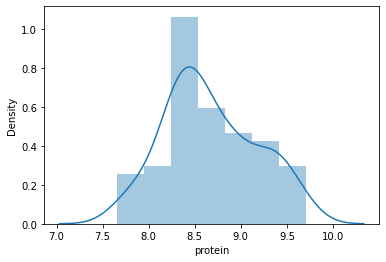

In [18]:
sns.distplot(corn_df["protein"])

C:\Users\alexo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='moisture', ylabel='Density'>

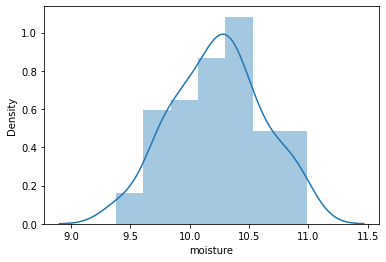

In [19]:
sns.distplot(corn_df["moisture"])

Let's check for outliers

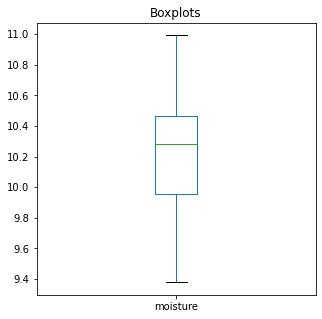

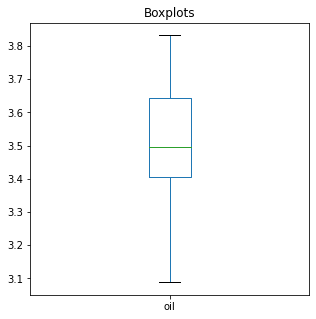

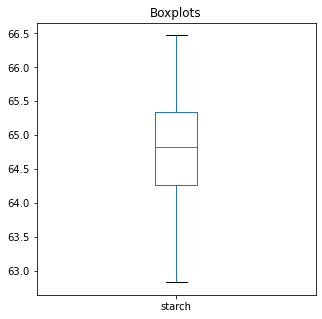

In [20]:
cols = ["moisture", "oil", "starch"] 
aux_df = corn_df[cols]
for col in aux_df:
    aux_df[col].plot(kind='box', figsize=(5,5),title='Boxplots')
    plt.show()

The data appears to have been cleaned up ahead of time, based on how neat it is.

Text(0.5, 0, '$\\lambda$ [nm]')

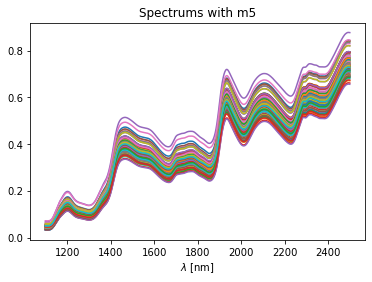

In [21]:
x = range(1100, 2499, 2)
for m5spec_ in corn_df["m5spec"]:
    plt.plot(x, m5spec_)
plt.title("Spectrums with m5")
plt.xlabel(r"$\lambda$ [nm]")

Text(0.5, 0, '$\\lambda$ [nm]')

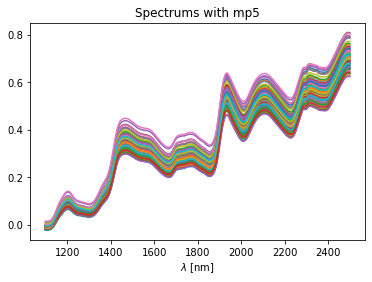

In [22]:
for mp5spec_ in corn_df["mp5spec"]:
    plt.plot(x, mp5spec_)
plt.title("Spectrums with mp5")
plt.xlabel(r"$\lambda$ [nm]")

Text(0.5, 0, '$\\lambda$ [nm]')

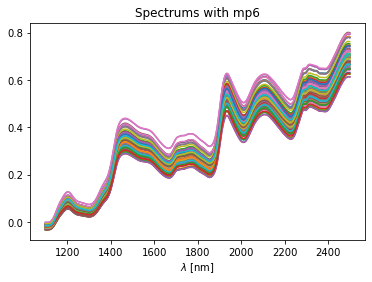

In [23]:
for mp6spec_ in corn_df["mp6spec"]:
    plt.plot(x, mp6spec_)
plt.title("Spectrums with mp6")
plt.xlabel(r"$\lambda$ [nm]")

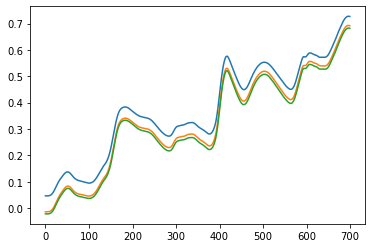

In [24]:
plt.plot(m5spec[1])
plt.plot(mp5spec[1])
plt.plot(mp6spec[1])

There are some variations among the spectrums, but the general shape remains the same.